In [0]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
!pip install numpy==1.16.1
import numpy as np

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [33]:
print(train_labels.shape)

(25000,)


In [34]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [0]:
data = np.concatenate((train_data, test_data), axis = 0)

In [0]:
labels = np.concatenate((train_labels, test_labels ), axis = 0)

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [39]:
print(x_train.shape)

(25000, 10000)


In [0]:
model = models.Sequential()

In [0]:
model.add(layers.Dense(50, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.3, noise_shape = None, seed = None))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dropout(0.2, noise_shape = None, seed = None))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                500050    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 502,651
Trainable params: 502,651
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'Adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [56]:
results = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 4s 158us/step - loss: 0.0796 - acc: 0.9707 - val_loss: 0.4268 - val_acc: 0.8635
Epoch 2/10
25000/25000 [==============================] - 4s 154us/step - loss: 0.0567 - acc: 0.9802 - val_loss: 0.6094 - val_acc: 0.8605
Epoch 3/10
25000/25000 [==============================] - 4s 151us/step - loss: 0.0355 - acc: 0.9874 - val_loss: 0.6087 - val_acc: 0.8605
Epoch 4/10
25000/25000 [==============================] - 4s 150us/step - loss: 0.0340 - acc: 0.9875 - val_loss: 0.5858 - val_acc: 0.8667
Epoch 5/10
25000/25000 [==============================] - 4s 153us/step - loss: 0.0262 - acc: 0.9913 - val_loss: 0.7116 - val_acc: 0.8643
Epoch 6/10
25000/25000 [==============================] - 4s 151us/step - loss: 0.0244 - acc: 0.9917 - val_loss: 0.6406 - val_acc: 0.8640
Epoch 7/10
25000/25000 [==============================] - 4s 149us/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.7537 - 

In [0]:
history_dict = results.history

In [58]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

In [0]:
val_loss_values = history_dict['val_loss']

In [0]:
loss_values = history_dict['loss']

In [0]:
epochs = range(1, len(loss_values) + 1)

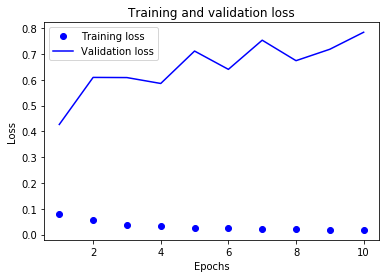

In [63]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

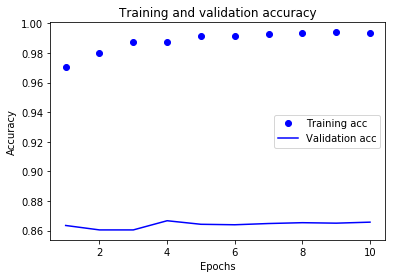

In [66]:
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
model.predict(x_test)

array([[1.5345216e-03],
       [1.0000000e+00],
       [9.9999541e-01],
       ...,
       [2.5013742e-01],
       [2.9176474e-05],
       [9.9949932e-01]], dtype=float32)